# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [9]:
import pandas as pd
import gdown
import os

# Step 1: Use gdown to download the file from Google Drive
# Make sure to replace 'YOUR_NEW_FILE_ID' with the actual file ID from the new link
url = "https://drive.google.com/uc?export=download&id=1gi3Dxw2AmyDgbAI5sje9ouj3pWf-XroJ"  # Ensure this is the correct link
output = "customer_booking.csv"
gdown.download(url, output, quiet=False)

# Step 2: Load the CSV file into a pandas DataFrame
if os.path.exists(output):
    df = pd.read_csv(output, encoding="ISO-8859-1")  # Specify encoding
    
    # Step 3: Perform basic exploration
    print("Data preview:")
    print(df.head())
    print("\nData info:")
    print(df.info())

    # Step 4: Map 'flight_day' column values to numeric equivalents
    mapping = {
        "Mon": 1,
        "Tue": 2,
        "Wed": 3,
        "Thu": 4,
        "Fri": 5,
        "Sat": 6,
        "Sun": 7,
    }
    
    df["flight_day"] = df["flight_day"].map(mapping)

    # Step 5: Confirm 'flight_day' conversion
    print("\nUnique values in 'flight_day' after mapping:")
    print(df["flight_day"].unique())
    
else:
    print("Failed to download or find the file.")


Downloading...
From: https://drive.google.com/uc?export=download&id=1gi3Dxw2AmyDgbAI5sje9ouj3pWf-XroJ
To: /Users/khobyskills/Downloads/customer_booking.csv
100%|██████████| 3.15M/3.15M [00:00<00:00, 7.19MB/s]


Data preview:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                

In [5]:
# Step 3: Load the CSV into a pandas DataFrame with the correct encoding
df = pd.read_csv(output, encoding='ISO-8859-1')

# Step 4: Preview the data
print(df.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

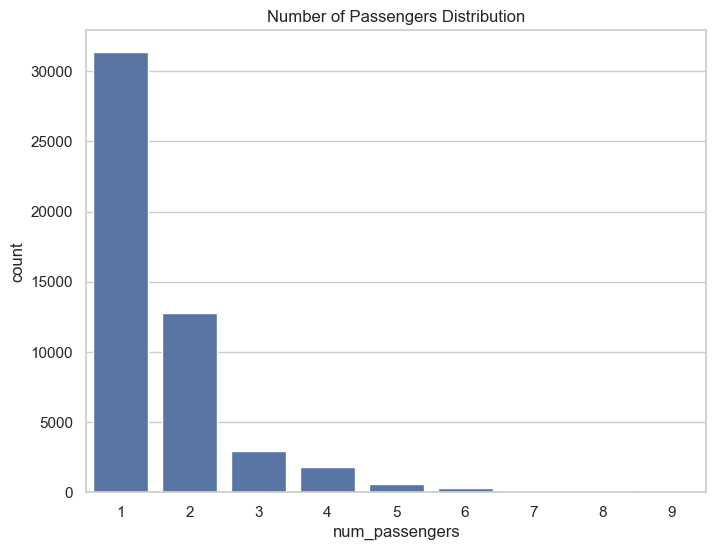

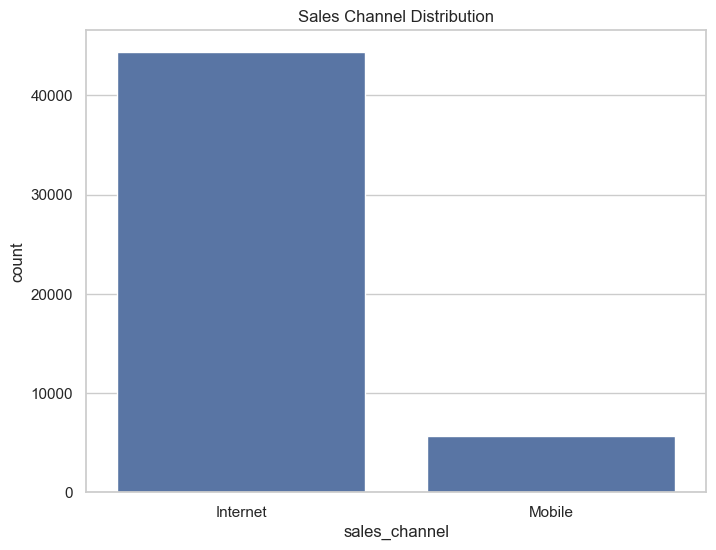

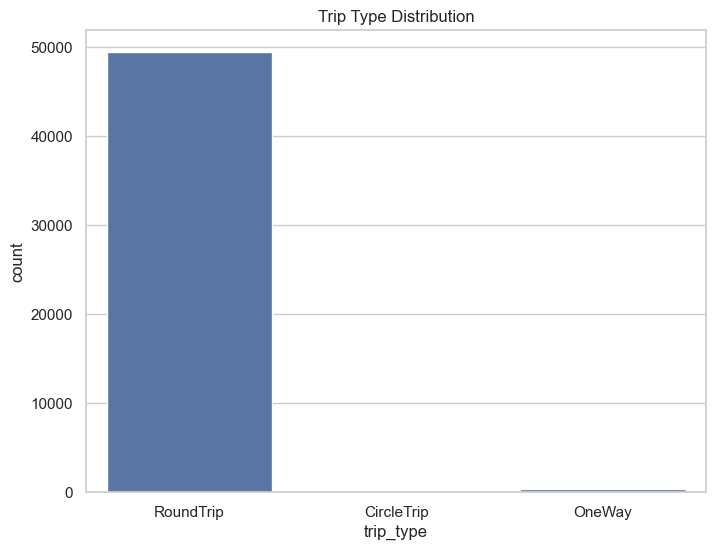

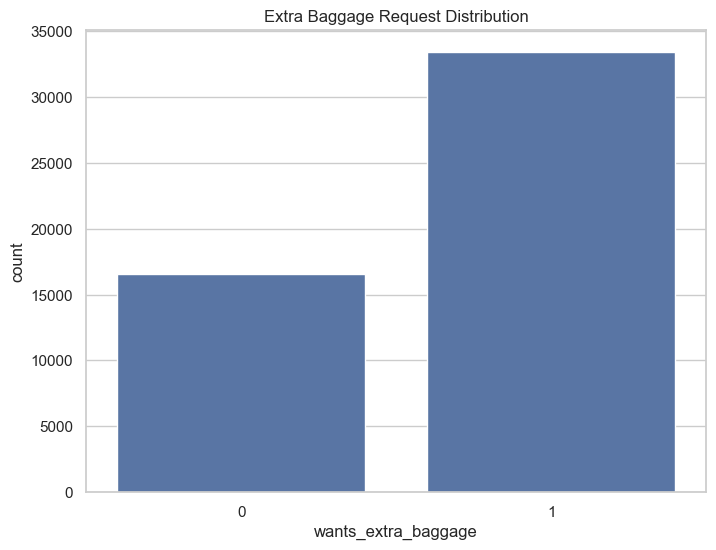

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of `num_passengers`
plt.figure(figsize=(8, 6))
sns.countplot(x='num_passengers', data=df)
plt.title('Number of Passengers Distribution')
plt.show()

# Plot distribution of `sales_channel`
plt.figure(figsize=(8, 6))
sns.countplot(x='sales_channel', data=df)
plt.title('Sales Channel Distribution')
plt.show()

# Plot distribution of `trip_type`
plt.figure(figsize=(8, 6))
sns.countplot(x='trip_type', data=df)
plt.title('Trip Type Distribution')
plt.show()

# Plot distribution of `wants_extra_baggage`
plt.figure(figsize=(8, 6))
sns.countplot(x='wants_extra_baggage', data=df)
plt.title('Extra Baggage Request Distribution')
plt.show()

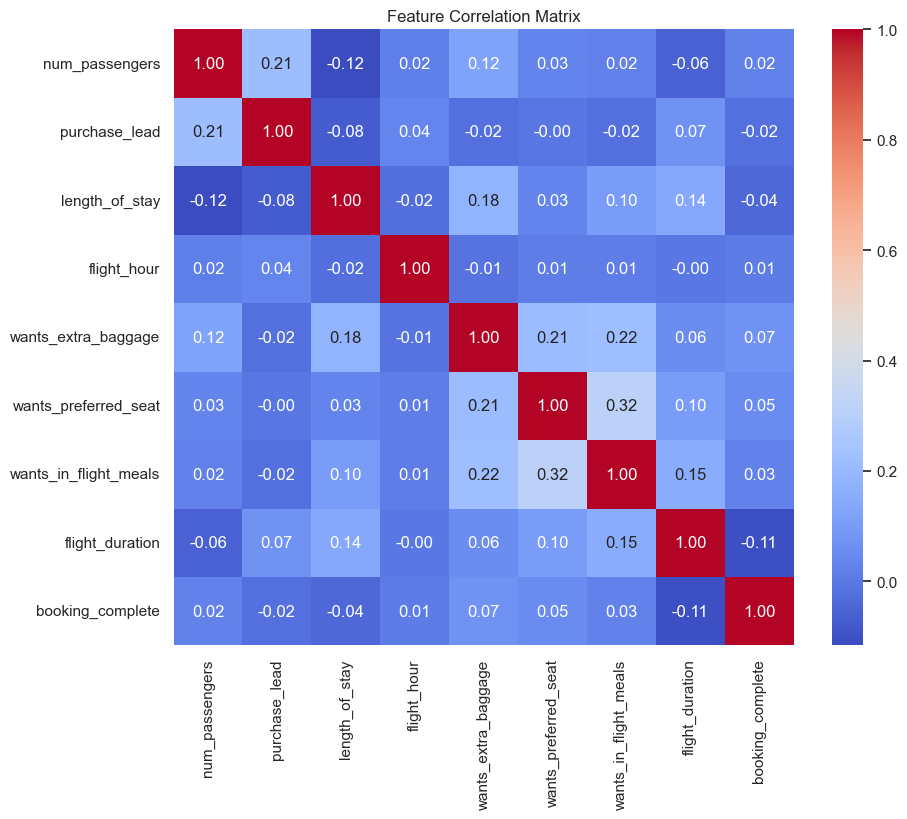

In [8]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix for the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'booking_origin', 'flight_day', 'route'])

# Define features (X) and target (y)
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8508

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     12784
           1       0.48      0.12      0.20      2216

    accuracy                           0.85     15000
   macro avg       0.67      0.55      0.56     15000
weighted avg       0.81      0.85      0.81     15000



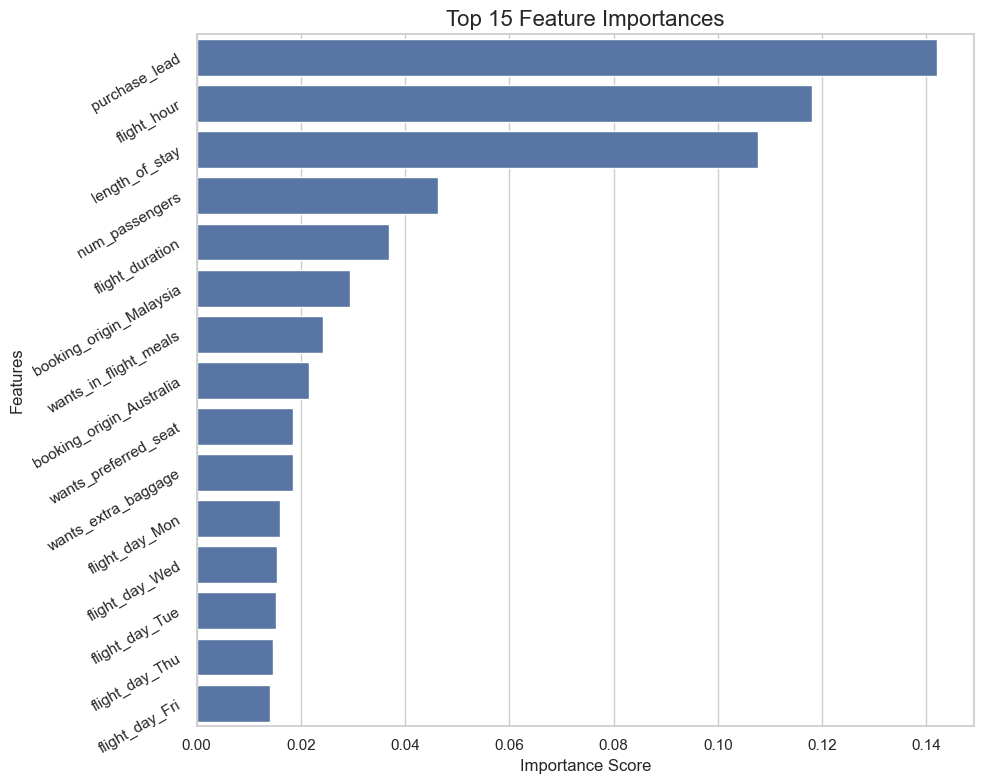

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # or your chosen model

# Assuming you have already trained a model
model = RandomForestClassifier()  # Example model (make sure you've trained it on your data)
model.fit(X_train, y_train)  # Ensure that you've trained the model with your data

# Get feature importances from the trained model
feature_importance = model.feature_importances_

# Importances sorted and selecting top 15 most important features
importance_sorted_idx = np.argsort(feature_importance)[::-1][:15]  # Select top 15 features

# Increase figure size
plt.figure(figsize=(10, 8))

# Create bar plot for feature importances
sns.barplot(x=feature_importance[importance_sorted_idx], 
            y=X_train.columns[importance_sorted_idx])  # Use X_train if this is your training data

# Set plot title and labels
plt.title('Top 15 Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate the y-axis labels slightly for readability
plt.yticks(rotation=30)

# Display the plot
plt.tight_layout()
plt.show()